In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.Pclass.value_counts()#Сколько людей и в каком классе

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Pclass'>

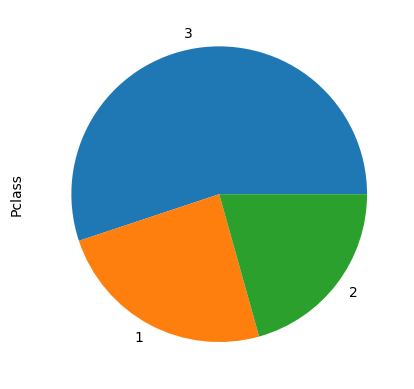

In [6]:
df.Pclass.value_counts().plot.pie()

In [7]:
df.Age.mean()#Средний возраст(где заполнено)

29.69911764705882

In [8]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

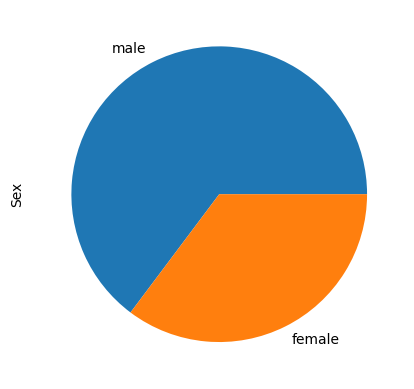

In [9]:
df.Sex.value_counts().plot.pie()##Сотношение полов

In [10]:
data = df.Survived.value_counts().reset_index()

In [11]:
data

,index,Survived
0,0,549
1,1,342


<AxesSubplot:xlabel='index', ylabel='Survived'>

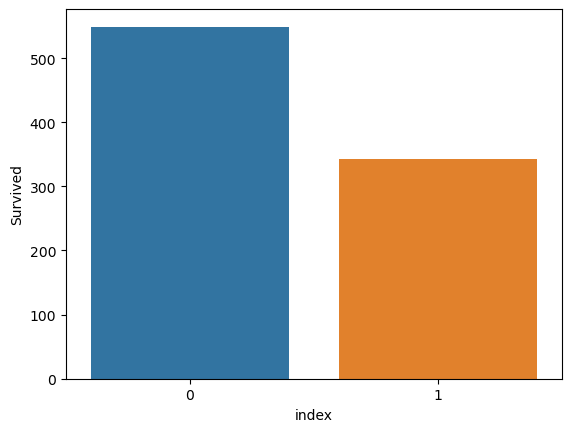

In [12]:
sns.barplot(data = data, x = 'index', y = 'Survived')##доля погибших и выживших

In [13]:
df.groupby(['Ticket','Survived']).size()#С камими номерами билетов выжили  

Ticket       Survived
110152       1           3
110413       0           1
             1           2
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Length: 730, dtype: int64

In [14]:
df['Age_gr']=df['Age']#Создаем возрастные группы
df['Age_gr'].fillna(-1,inplace=True)
df['Age_gr']=df['Age_gr'].map(lambda Age:int(Age//10)+1)
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3


In [15]:
df.Age_gr.value_counts()

3    220
0    177
4    167
2    102
5     89
1     62
6     48
7     19
8      6
9      1
Name: Age_gr, dtype: int64

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_gr', ylabel='count'>

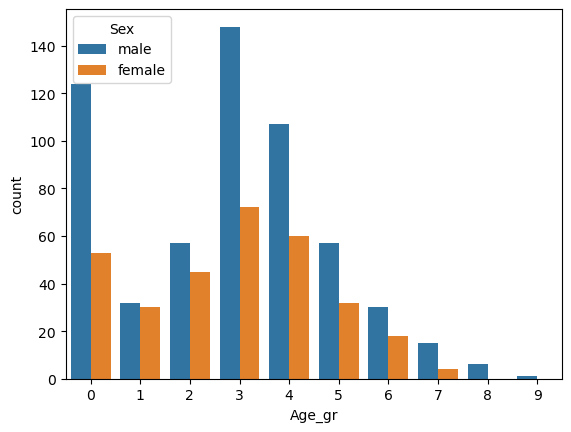

In [16]:
sns.countplot(df['Age_gr'], x = df.Age_gr, hue = df['Sex'])##Кол-во людей и какого пола в каждой возрастной группе

In [17]:
df.groupby(['Age_gr','Survived']).size()#Кол-во выхивших и погибших в каждой возрастной группе

Age_gr  Survived
0       0           125
        1            52
1       0            24
        1            38
2       0            61
        1            41
3       0           143
        1            77
4       0            94
        1            73
5       0            55
        1            34
6       0            28
        1            20
7       0            13
        1             6
8       0             6
9       1             1
dtype: int64

C:\Users\Alexey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

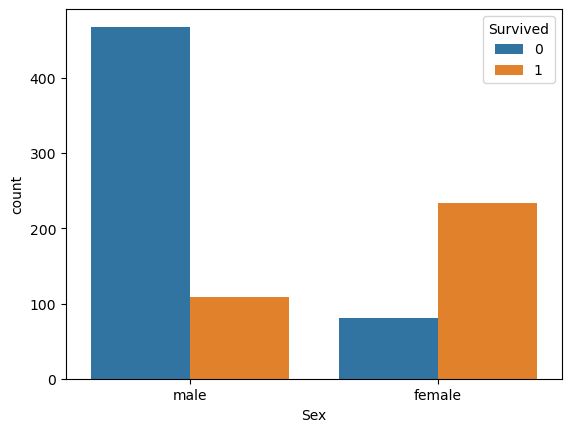

In [23]:
sns.countplot(df['Sex'], x = df.Sex, hue = df['Survived'] )##Соотношение выживших и погибших мужчин и женщин

In [21]:
df.groupby(['Sex','Pclass']).agg({'Survived':'mean'})#Сколько (в отн.ед.) выжило мужчин и женщин и в каком классе

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447